# 2-wymiarowy rozkład Normalny

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie 
Proszę wygenerować próbkę z rozkładu Normalnego
$$
m = [0,0]
$$

oraz

$$
\Sigma = [[4.40, -2.75], [-2.75,  5.50]]
$$

In [22]:
mean1 = np.array([0, 0])
cov1 = np.array([[4.40, -2.75], [-2.75,  5.50]])
X1_rv=multivariate_normal(mean1, cov1)
X = X1_rv.rvs(1000)

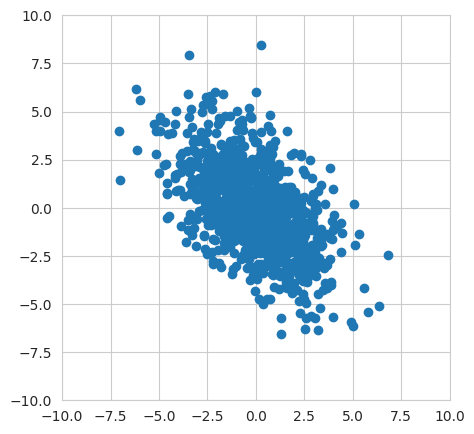

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.show()

# Zadanie 
Proszę policzyć średnią oraz macierz kowariancji próbki.

In [24]:
means = X.mean(axis=0)
cov = np.cov(X.T)

print(f"Mean: {means}")
print(f"Cov:\n {cov}")

Mean: [-0.04870095 -0.01822054]
Cov:
 [[ 4.20566917 -2.44861958]
 [-2.44861958  5.0587313 ]]


# Zadanie
Proszę zdefiniować zmienną losową o razkładzie zadanym na podstawie empirycznej średniej i kowariancji oraz narysować na jednym wykresie:

- próbkę
- poziomice rozkładu normalnego 

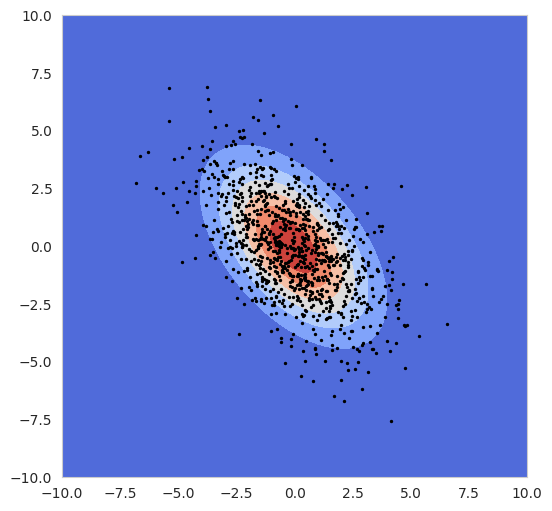

In [25]:
X2_rv=multivariate_normal(means, cov)
samples = X2_rv.rvs(1000)

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

positions = np.array([X.flatten(), Y.flatten()])
Z = X2_rv.pdf(positions.T).reshape(100, 100)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.contourf(X, Y, Z,cmap="coolwarm")
ax.scatter(samples[:, 0], samples[:, 1], s=2, c="black")
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.show()

# Zadanie
Policz wektory i wartości własne macierzy kowariancji. Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

Eigenvalues:
 [2.14670902 7.11769145]
Eigenvectors:
 [[-0.76537845  0.64358047]
 [-0.64358047 -0.76537845]]


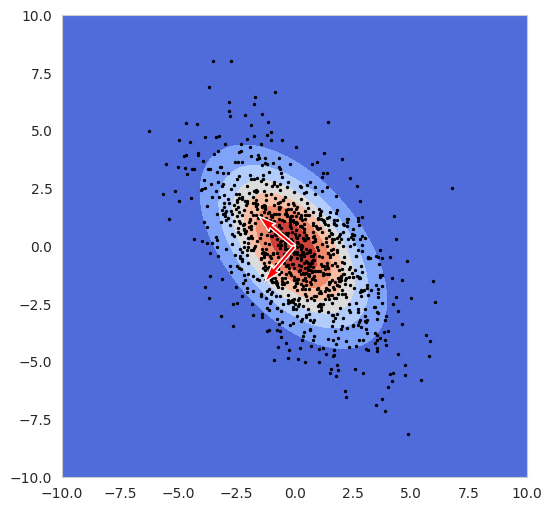

In [26]:
X2_rv=multivariate_normal(means, cov)
samples = X2_rv.rvs(1000)

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

positions = np.array([X.flatten(), Y.flatten()])
Z = X2_rv.pdf(positions.T).reshape(100, 100)

eigenvalues, eigenvectors = np.linalg.eig(cov)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.contourf(X, Y, Z, cmap="coolwarm")
ax.scatter(samples[:, 0], samples[:, 1], s=2, c="black")

ax.quiver([0,0], [0,0], eigenvectors[:, 0], eigenvectors[:, 1], color="red", linewidth=1, scale=10)
    
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.show()

# Zadanie 
Proszę wygenerować próbkę na kwadracie $[0,1] \times [0,1]$.
Następnie proszę policzyć średnią oraz macierz kowariancji próbki.

Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

In [27]:

mean = np.array([0.5, 0.5])
cov = np.array([[1 / 16, 0.0], [0.0, 1 / 16]])

X3_rv = multivariate_normal(mean, cov)
points = X3_rv.rvs(10000)

mean = np.mean(points, axis=0)
mean

array([0.50337775, 0.50098541])

In [28]:
cov = np.cov(points.T)
cov

array([[0.06212515, 0.00045928],
       [0.00045928, 0.06283909]])

Eigenvalues:
 [0.06190043 0.06306382]
Eigenvectors:
 [[-0.89824082 -0.43950362]
 [ 0.43950362 -0.89824082]]


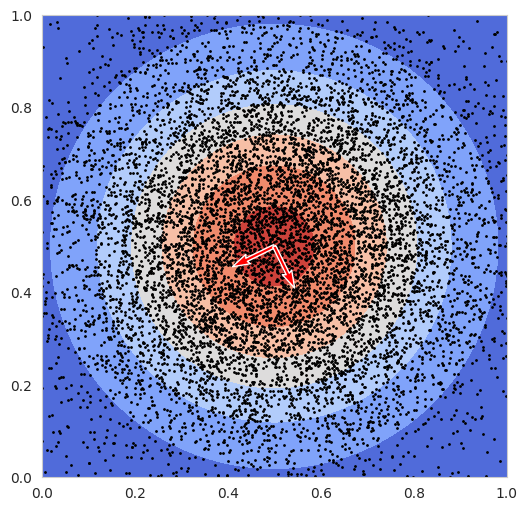

In [34]:

eigenvalues, eigenvectors = np.linalg.eig(cov)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

positions = np.array([X.flatten(), Y.flatten()])
Z = X3_rv.pdf(positions.T).reshape(100, 100)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.contourf(X, Y, Z, cmap="coolwarm")
ax.scatter(points[:, 0], points[:, 1], s=1, c="black")
ax.quiver([0.5,0.5], [0.5,0.5], eigenvectors[:, 0], eigenvectors[:, 1], color="red", linewidth=1, scale=10)

ax.set_xlim([0,1])
ax.set_ylim([0,1])

plt.show()